In [2]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.neighbors import KNeighborsClassifier
from playML.metrics import plot_decision_boundary
from playML.Bayes import BayerGN
from playML.model_selection import train_test_split
X, Y = np.loadtxt("X_train.csv", delimiter=","),np.loadtxt("y_train.csv", delimiter=",")
X_test, y_test =  np.loadtxt("X_test.csv", delimiter=","), np.loadtxt("y_test.csv", delimiter=",")

## sklearn中的GaussionNB

In [2]:
def bayes1d(i):
    from sklearn.naive_bayes import GaussianNB
    models = (GaussianNB(priors = [0.1, 0.9]),
               GaussianNB(priors=[0.5,0.5]),
               GaussianNB(priors=[0.25,0.75]),
               GaussianNB(priors=[0.75,0.25])) 
    models = [clf.fit(X[:,i].reshape(-1,1), Y) for clf in models]
    # scores
    scores = [model.score(X_test[:,i].reshape(-1,1), y_test) for model in models]
    print("accuracy")
    print(scores)
    # title for the plots
    titles = ('priors = [0.1, 0.9]',
              'priors=[0.5,0.5]',
              'priors=[0.25,0.75]',
              'priors=[0.75,0.25]')
    labels = ("height","weight","size of feet")
    print(labels[i])
    fig, sub = plt.subplots(1, 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    from sklearn.metrics import roc_curve
    
    fprs = []
    tprs = []
    decision_scores = models[0].predict_proba(X_test[:,i].reshape(-1,1))
    decision_scores=decision_scores[:,0]-decision_scores[:,1]
    tprs, fprs,t  = roc_curve( y_test, decision_scores)

#         fprs, tprs,t  = roc(decision_scores, y_test)
    sub.plot(fprs, tprs)
    sub.set_xlabel("fprs")
    sub.set_ylabel("tprs")
    sub.set_xticks(())
    sub.set_yticks(())
    sub.set_title(titles[0])

## 自己封装的Bayes但是与sklearn中的有差别

accuracy
[0.7674418604651163, 0.8604651162790697, 0.7906976744186046, 0.8604651162790697]
height
accuracy
[0.6744186046511628, 0.813953488372093, 0.7906976744186046, 0.7674418604651163]
weight
accuracy
[0.9534883720930233, 0.9534883720930233, 0.9534883720930233, 0.9302325581395349]
size of feet


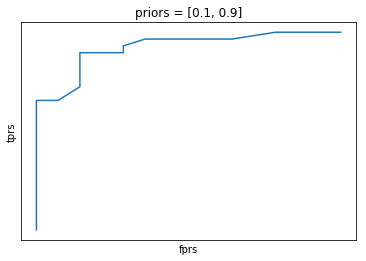

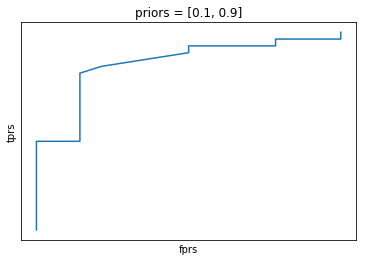

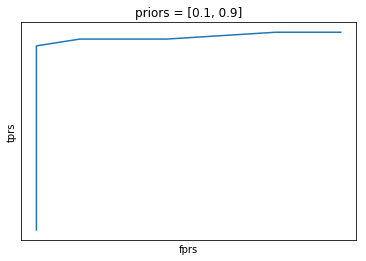

In [3]:
bayes1d(0)
bayes1d(1)
bayes1d(2)

In [5]:
def bayes1d(i):
    from playML.Bayes import BayerGN
    models = (BayerGN(priors = [0.1, 0.9]),
               BayerGN(priors=[0.5,0.5]),
               BayerGN(priors=[0.25,0.75]),
               BayerGN(priors=[0.75,0.25]))
    models = [clf.fit(X[:,i], Y) for clf in models]
    # scores
    scores = [model.score(X_test[:,i], y_test) for model in models]
    print("accuracy")
    print(scores)
    # title for the plots
    titles = ('priors = [0.1, 0.9]',
              'priors=[0.5,0.5]',
              'priors=[0.25,0.75]',
              'priors=[0.75,0.25]')
    labels = ("height","weight","size of feet")
    print(labels[i])
    fig, sub = plt.subplots(1, 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    from playML.metrics import roc
    from sklearn.metrics import roc_curve
    fprs = []
    tprs = []

    decision_scores = models[0].decision_function(X_test[:,i])
    fprs, tprs,t  = roc_curve( y_test, decision_scores)

#         fprs, tprs,t  = roc(decision_scores, y_test)
    sub.plot(fprs, tprs)
    sub.set_xlabel("fprs")
    sub.set_ylabel("tprs")
    sub.set_xticks(())
    sub.set_yticks(())
    sub.set_title(titles[0]+" "+labels[i])

accuracy
[0.32558139534883723, 0.6744186046511628, 0.32558139534883723, 0.6744186046511628]
height
accuracy
[0.32558139534883723, 0.32558139534883723, 0.32558139534883723, 0.6744186046511628]
weight
accuracy
[0.4418604651162791, 0.6744186046511628, 0.9534883720930233, 0.6744186046511628]
size of feet


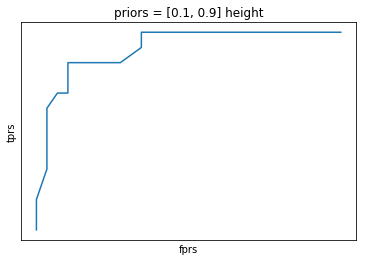

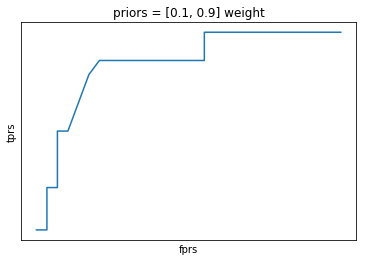

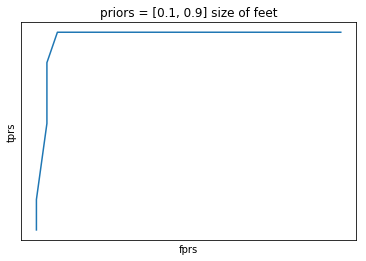

In [6]:
bayes1d(0)
bayes1d(1)
bayes1d(2)